In [1]:
import pandas as pd # manipulate data
import seaborn as sns # load dataset
import numpy as np # turning lists into arrays
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # data splitting
from sklearn.preprocessing import MinMaxScaler # normalization
from sklearn.impute import SimpleImputer # fill NaN values
from sklearn.pipeline import make_pipeline # creating a pipeline

from category_encoders import OneHotEncoder # creating features

from tensorflow import keras # for the neural network
from tensorflow.keras.models import Sequential # the model
from tensorflow.keras.layers import Dense, Dropout # layers for nerual network

In [2]:
df = sns.load_dataset("titanic")
print(f"""{df.describe()} 

{df.describe(exclude="number")} 

{df.isnull().sum()}""")

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200 

         sex embarked  class  who adult_male deck  embark_town alive alone
count    891      889    891  891        891  203          889   891   891
unique     2        3      3    3          2    7            3     2     2
top     male        S  Third  man       True    C  Southampton    no  T

In [3]:
# drop uneeded columns
df = df.drop(['alive', 'adult_male', 'who', 'deck'], axis=1)

In [4]:
# pipe
pipe = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy="median"),
    MinMaxScaler()
)

In [5]:
# split features and targets
target = 'survived'
X = df.drop(target, axis=1)
y = df[target]
print(f"X shape: {X.shape}\ny shape: {y.shape}")

# split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
print(f"""X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}""")

X shape: (891, 10)
y shape: (891,)
X_train shape: (668, 10)
y_train shape: (668,)
X_test shape: (223, 10)
y_test shape: (223,)


In [6]:
# apply pipe
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)
print(f"""X_train Shape: {X_train.shape}
X_test Shape: {X_test.shape}
""")

X_train Shape: (668, 19)
X_test Shape: (223, 19)



In [7]:
# cast y as np.array for modeling
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
# NN
model = Sequential()

model.add(Dense(10, input_dim=19, activation='relu'))

model.add(Dense(100, activation='relu'))
model.add(Dense(380, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(100, activation='relu'))
model.add(Dense(380, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(380, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              validation_split=.2,
              batch_size = 16,
              metrics=['accuracy'],
              )

history = model.fit(X_train, y_train, epochs=1000, verbose=0)

In [50]:
model.evaluate(X_test, y_test)

223/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.0428909635329995, 0.793722]

''

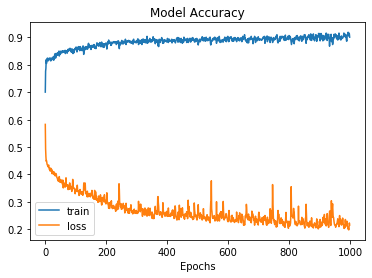

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'loss'])
;

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

- I set out with the goal of trying to predict the survival rate on the titanic using a simple neural network. Creating a neural network helped me practice some of the tools I've learned at Lambda and cement my understanding. Plus, it was fun to do.

2.  What was the most challenging part of what you did?

- The most challenging part was creating the right neural network architecture to provide the best results.

3.  What was the most interesting thing you learned?

- I enjoyed becoming more familiar with dropout layers in Keras and becoming more familiar with TensorFlow.

4.  What area would you like to explore with more time?

- Given more time, I would like to do more feature engineering.

